In [1]:
# Import of libraries that are needed to run the code
import requests
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import seaborn as sns
%matplotlib inline

In the following the txt-file contains JSON-data that is injected at runtime in the ranking page. This file was found by using the interceptor plugin that shows the contents that are called by the page after the HTTP-request GET is done.

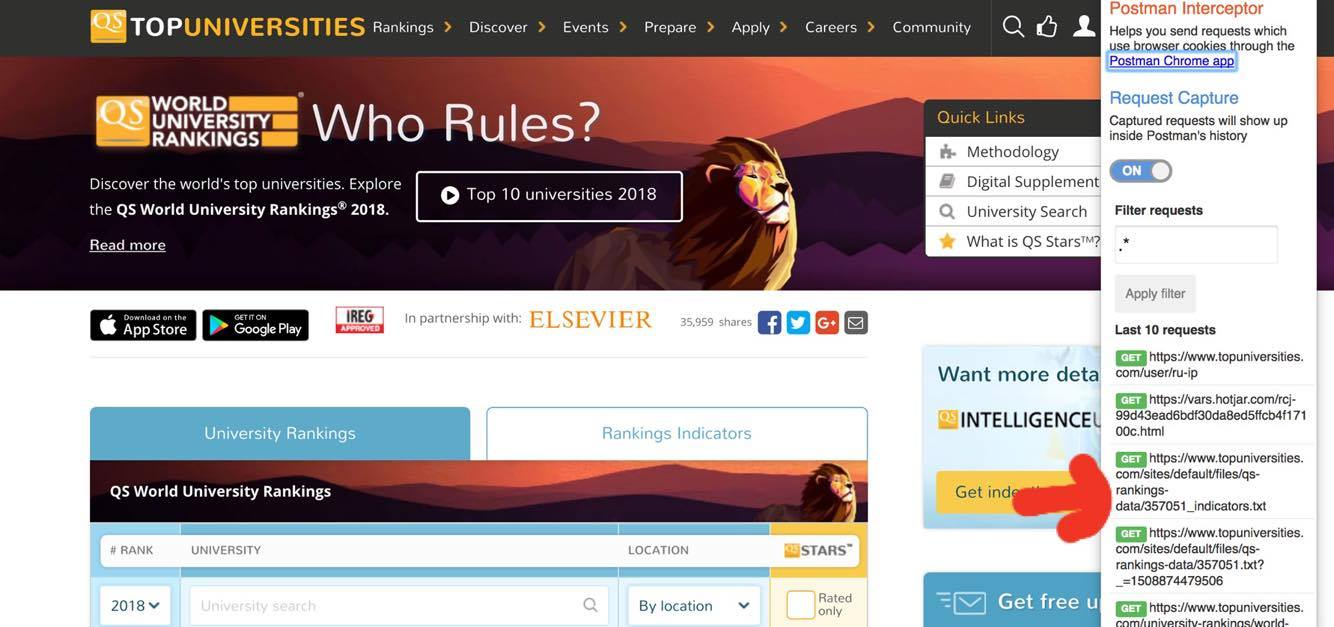

In [2]:
from IPython.display import Image
Image('/Users/KhalilCherif/Desktop/ada-hw2/interceptor_screen.jpg', width=800,height=600)

In [3]:
# The URL to the txt-file
URL='https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051_indicators.txt'

In [4]:
# get the JSON-data and consider the first 200 entries
response = requests.get(URL)
data = json.loads(response.text)
ranking_data = data['data'][:200]

In [5]:
# create a dataframe
top_unis =pd.DataFrame(ranking_data)

In [6]:
# this method converts a string to a BeautifulSoup object that fetch for a single link (tag <a>) and returns its
# content laying between the opening and ending tags (i.e. <a href="">content</a>)
def decode_content(tag):
    return soup(tag,'html.parser').a.decode_contents()

In [7]:
# add new column that contains the university name
top_unis['university name'] = top_unis['uni'].apply(decode_content)

In [8]:
# add new column that contains the url the university page
hrefs = top_unis['uni'].apply(lambda tag: soup(tag,'html.parser').find('a', href = True)['href'])
urls = hrefs.apply(lambda href : 'https://www.topuniversities.com' + href )
top_unis['url'] = urls

In [9]:
# go through all links and gather the details in the corresponding columns
top_unis['Total Staff']=""
top_unis['Inter Staff']=""
top_unis['Total Student']=""
top_unis['Inter Student']=""
top_unis['Ratio Staff/Student']=""
top_unis['Ratio Inter/Student']=""
for i in range(len(top_unis)):
    url=top_unis['url'].iloc[i]
    try: 
        response = requests.get(url)
        content = soup(response.text, 'html.parser')
        total_faculty = content.find('div',{ "class" : "total faculty" }).find('div',{ "class" : "number" }).string.strip()
        inter_faculty = content.find('div',{ "class" : "inter faculty" }).find('div',{ "class" : "number" }).string.strip()
        total_student = content.find('div',{ "class" : "total student" }).find('div',{ "class" : "number" }).string.strip()
        inter_student = content.find('div',{ "class" : "total inter" }).find('div',{ "class" : "number" }).string.strip()
        top_unis.loc[i,'Total Staff'] = int(total_faculty.replace(',',''))
        top_unis.loc[i,'Inter Staff'] = int(inter_faculty.replace(',',''))
        top_unis.loc[i,'Total Student'] = int(total_student.replace(',',''))
        top_unis.loc[i,'Inter Student'] = int(inter_student.replace(',',''))
        top_unis.loc[i,'Ratio Staff/Student']= int(total_faculty.replace(',','')) /int(total_student.replace(',',''))
        top_unis.loc[i,'Ratio Inter/Student']= int(inter_student.replace(',','')) /int(total_student.replace(',',''))
    except AttributeError:
        top_unis.loc[i,'Total Staff'] = np.nan
        top_unis.loc[i,'Inter Staff'] = np.nan
        top_unis.loc[i,'Total Student'] = np.nan
        top_unis.loc[i,'Inter Student'] = np.nan
        top_unis.loc[i,'Ratio Staff/Student'] = np.nan
        top_unis.loc[i,'Ratio Inter/Student'] = np.nan

In [10]:
top_unis = top_unis[['overall_rank','university name','region','location','url','Total Staff','Inter Staff','Total Student','Inter Student','Ratio Staff/Student','Ratio Inter/Student']]

In [11]:
# convert location to a category
top_unis['location']= top_unis['location'].astype('category')

In [12]:
# convert region to a category
top_unis['region'] = top_unis['region'].astype('category')

# 1.a The best universities in term of ratio Staff/Student

In [13]:
# The best universities in term of ratio Staff/Student
top_unis['university name,Ratio Staff/Student'.split(',')].sort_values(['Ratio Staff/Student'], ascending=False)

,university name,Ratio Staff/Student
3,California Institute of Technology (Caltech),0.422616
15,Yale University,0.398323
5,University of Oxford,0.342292
4,University of Cambridge,0.292488
16,Johns Hopkins University,0.276353
1,Stanford University,0.26987
0,Massachusetts Institute of Technology (MIT),0.26945
185,University of Rochester,0.266604
18,University of Pennsylvania,0.266437
17,Columbia University,0.247115


# 1.b The best universities in term of ratio Inter/Student

In [14]:
# The best universities in term of ratio Inter/Student
top_unis['university name,Ratio Inter/Student'.split(',')].sort_values(by='Ratio Inter/Student', ascending=False)

,university name,Ratio Inter/Student
34,London School of Economics and Political Scien...,0.691393
11,Ecole Polytechnique Fédérale de Lausanne (EPFL),0.570047
7,Imperial College London,0.543567
199,Maastricht University,0.502533
46,Carnegie Mellon University,0.478062
6,UCL (University College London),0.477928
91,University of St Andrews,0.457955
41,The University of Melbourne,0.427434
126,Queen Mary University of London,0.421816
25,The University of Hong Kong,0.407144


# 1.c The best universities in term of ratio Staff/Student & Inter/Student aggregated by country 

In [15]:
# The best universities in term of ratio Staff/Student aggregated by country
g1 = top_unis.set_index('university name').groupby('location').apply(lambda x: x['Ratio Staff/Student'].sort_values(ascending=False))
df_location_staff_stud = pd.DataFrame(g1)
df_location_staff_stud

Ratio Staff/Student
location      university name                                                    
Argentina     Universidad de Buenos Aires (UBA)                          0.134267
Australia     The Australian National University                         0.110788
              The University of Queensland                              0.0842201
              The University of Adelaide                                 0.081403
              The University of Melbourne                               0.0784932
              The University of Western Australia                       0.0766284
              The University of New South Wales (UNSW Sydney)           0.0734969
              The University of Sydney                                  0.0719825
              Monash University                                         0.0557867
              University of Technology Sydney                           0.0548602
Austria       University of Vienna                                      0.0742054
              Vienna University of Technology                           0.0403913
Belgium       Vrije Universiteit Brussel (VUB)                            0.19302
              Ghent University                                          0.0700623
              KU Leuven                                                 0.0552286
              Université catholique de Louvain (UCL)                    0.0502121
Brazil        Universidade de São Paulo                                 0.0849477
              Universidade Estadual de Campinas (Unicamp)               0.0740629
Canada        McMaster University                                        0.136318
              University of Toronto                                      0.132688
              McGill University                                          0.126435
              University of Alberta                                      0.112105
              University of British Columbia                            0.0923138
              Université de Montréal                                    0.0757057
              University of Waterloo                                    0.0475226
Chile         Pontificia Universidad Católica de Chile (UC)             0.0836944
China         Tsinghua University                                         0.15168
              Fudan University                                           0.138562
              University of Science and Technology of China              0.124251
              Peking University                                          0.123054
...                                                                           ...
United States Dartmouth College                                          0.150868
              University of Wisconsin-Madison                            0.146774
              Rice University                                            0.146596
              Brown University                                            0.14085
              The Ohio State University                                  0.136968
              Princeton University                                       0.124799
              Cornell University                                         0.124087
              Boston University                                          0.123022
              University of Colorado Boulder                             0.121943
              University of Florida                                      0.119138
              University of Virginia                                     0.116373
              University of California, San Diego (UCSD)                 0.114589
              University of California, Davis                            0.112224
              University of Maryland, College Park                        0.11041
              Carnegie Mellon University                                 0.100479
              University of California, Berkeley (UCB)                  0.0904831
              Purdue University             

In [16]:
# The best universities in term of ratio Inter/Student aggregated by country
g1 = top_unis.set_index('university name').groupby('location').apply(lambda x: x['Ratio Inter/Student'].sort_values(ascending=False))
df_location_staff_stud = pd.DataFrame(g1)
df_location_staff_stud

Ratio Inter/Student
location      university name                                                    
Argentina     Universidad de Buenos Aires (UBA)                          0.221658
Australia     The University of Melbourne                                0.427434
              The Australian National University                         0.384365
              The University of Adelaide                                 0.382015
              The University of Sydney                                    0.36484
              The University of New South Wales (UNSW Sydney)             0.35924
              Monash University                                          0.358296
              University of Technology Sydney                             0.32094
              The University of Queensland                               0.277889
              The University of Western Australia                        0.246884
Austria       University of Vienna                                       0.314748
              Vienna University of Technology                            0.297443
Belgium       Vrije Universiteit Brussel (VUB)                           0.199591
              Université catholique de Louvain (UCL)                     0.184043
              KU Leuven                                                  0.152093
              Ghent University                                           0.104704
Brazil        Universidade Estadual de Campinas (Unicamp)               0.0363541
              Universidade de São Paulo                                 0.0317451
Canada        McGill University                                          0.330825
              University of Toronto                                      0.303433
              University of Alberta                                       0.25824
              University of Waterloo                                     0.252159
              Université de Montréal                                     0.247699
              University of British Columbia                             0.226177
              McMaster University                                        0.149692
Chile         Pontificia Universidad Católica de Chile (UC)             0.0366996
China         Peking University                                          0.168265
              Fudan University                                           0.160632
              Zhejiang University                                        0.113166
              Tsinghua University                                        0.112176
...                                                                           ...
United States Princeton University                                       0.222208
              University of California, San Diego (UCSD)                 0.206099
              University of Pennsylvania                                 0.205921
              Washington University in St. Louis                         0.200831
              Yale University                                            0.199081
              Brown University                                           0.197276
              Duke University                                            0.186945
              Northwestern University                                     0.18324
              University of Michigan                                      0.17445
              University of California, Los Angeles (UCLA)               0.171686
              Emory University                                             0.1676
              University of California, Berkeley (UCB)                   0.165818
              Michigan State University                                  0.165224
              The Ohio State University                                  0.159283
              Pennsylvania State University                              0.155244
              Dartmouth College                                          0.151832
              University of Washington      

# 1.d The best universities in term of ratio Staff/Student & Inter/Student aggregated by region

In [17]:
# The best universities in term of ratio Staff/Student aggregated by region
g1 = top_unis.set_index('university name').groupby('region').apply(lambda x: x['Ratio Staff/Student'].sort_values(ascending=False))
df_region_staff_stud = pd.DataFrame(g1)
df_region_staff_stud

Ratio Staff/Student
region        university name                                                       
Africa        University of Cape Town                                        0.08845
Asia          Pohang University of Science And Technology (PO...            0.213025
              Tohoku University                                             0.191339
              Kyoto University                                              0.176722
              King Fahd University of Petroleum &amp; Minerals              0.175828
              Nanyang Technological University, Singapore (NTU)             0.168545
              Nagoya University                                             0.168266
              The University of Tokyo                                       0.165475
              Tokyo Institute of Technology                                 0.158971
              National University of Singapore (NUS)                        0.156013
              Universiti Malaya (UM)                                        0.153893
              Kyushu University                                             0.153162
              Tsinghua University                                            0.15168
              The University of Hong Kong                                   0.149006
              Sungkyunkwan University (SKKU)                                0.148656
              Hokkaido University                                           0.148416
              City University of Hong Kong                                  0.145996
              Korea University                                              0.144639
              Seoul National University                                     0.140037
              Yonsei University                                             0.139791
              Fudan University                                              0.138562
              The Hebrew University of Jerusalem                            0.136047
              Hanyang University                                            0.132131
              KAIST - Korea Advanced Institute of Science &am...            0.127214
              University of Science and Technology of China                 0.124251
              Osaka University                                              0.123638
              Peking University                                             0.123054
              The Chinese University of Hong Kong (CUHK)                    0.122415
              The Hong Kong Polytechnic University                          0.116679
              Keio University CEMS MIM                                      0.116567
...                                                                              ...
North America Carnegie Mellon University                                    0.100479
              University of British Columbia                               0.0923138
              University of California, Berkeley (UCB)                     0.0904831
              Purdue University                                             0.085127
              University of Minnesota                                      0.0823374
              University of Southern California                            0.0806214
              Pennsylvania State University                                0.0769315
              Université de Montréal                                       0.0757057
              University of California, Los Angeles (UCLA)                 0.0712719
              Michigan State University                                    0.0641588
              University of California, Santa Barbara (UCSB)               0.0625945
              University of Illinois at Urbana-Champaign                   0.0601975
              University of California, Irvine                             0.0599048
              University of Texas at Austin                                 0.059027
              Texas A&amp;M University                                

In [18]:
# The best universities in term of ratio Inter/Student aggregated by region
g1 = top_unis.set_index('university name').groupby('region').apply(lambda x: x['Ratio Inter/Student'].sort_values(ascending=False))
df_region_staff_stud = pd.DataFrame(g1)
df_region_staff_stud

Ratio Inter/Student
region        university name                                                       
Africa        University of Cape Town                                       0.169703
Asia          The University of Hong Kong                                   0.407144
              City University of Hong Kong                                  0.354221
              Nanyang Technological University, Singapore (NTU)             0.281724
              The Hong Kong University of Science and Technology            0.281542
              National University of Singapore (NUS)                        0.272458
              The Chinese University of Hong Kong (CUHK)                     0.26745
              The Hong Kong Polytechnic University                          0.250381
              Universiti Malaya (UM)                                        0.194168
              Peking University                                             0.168265
              King Fahd University of Petroleum &amp; Minerals              0.163742
              Fudan University                                              0.160632
              Hanyang University                                            0.145494
              Korea University                                              0.140507
              Yonsei University                                             0.130448
              Sungkyunkwan University (SKKU)                                0.117804
              Zhejiang University                                           0.113166
              Tsinghua University                                           0.112176
              Tokyo Institute of Technology                                  0.10893
              National Taiwan University (NTU)                             0.0979034
              Nagoya University                                            0.0976765
              The University of Tokyo                                      0.0967411
              Kyushu University                                            0.0957663
              Osaka University                                             0.0925308
              Nanjing University                                           0.0910909
              Tohoku University                                            0.0899759
              Kyoto University                                             0.0866197
              National Tsing Hua University                                0.0854572
              Seoul National University                                    0.0830601
              Hokkaido University                                          0.0767434
...                                                                              ...
North America Michigan State University                                     0.165224
              The Ohio State University                                     0.159283
              Pennsylvania State University                                 0.155244
              Dartmouth College                                             0.151832
              McMaster University                                           0.149692
              University of Washington                                      0.146964
              University of California, Davis                               0.132257
              University of Maryland, College Park                          0.131901
              University of Wisconsin-Madison                               0.126202
              University of Pittsburgh                                       0.11128
              University of Minnesota                                       0.109504
              University of Florida                                         0.101066
              University of Texas at Austin                                0.0988436
              University of California, Santa Barbara (UCSB)               0.0919262
              University of Colorado Boulder                          

In [19]:
# convert the columns 'Ratio Staff/Student','Ratio Inter/Student' to numeric 
top_unis[['Ratio Staff/Student','Ratio Inter/Student']] = top_unis[['Ratio Staff/Student','Ratio Inter/Student']].apply(pd.to_numeric,errors='coerce')

In [20]:
# extract the timeshighereducation ranking and consider first 200 entries
my_url = 'https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json'
r2 = requests.get(my_url)
json_format = json.loads(r2.text)
data2 = json_format['data'][:200]
times_edu = pd.DataFrame(data2)

In [21]:
# clean some columns including the remove of characters such as %, and correct the datatype from object
import math
times_edu['international student proportion'] = times_edu['stats_pc_intl_students'].apply(lambda x: int(str(x).replace('%','').strip())/100.)
times_edu['number of students'] = times_edu['stats_number_students'].apply(lambda x: int(str(x).strip().replace(',','')))
times_edu['number of international student'] = (times_edu['number of students']*times_edu['international student proportion']).apply(lambda x: math.ceil(x))
times_edu['total number of staff'] = (times_edu['number of students']/times_edu['stats_student_staff_ratio'].astype('float')).apply(lambda x: math.ceil(x))
times_edu['staff student proportion'] = times_edu['stats_student_staff_ratio'].astype('float').apply(lambda x: (1/x))

In [22]:
# delete unneeded columns
times_edu.drop('aliases,stats_pc_intl_students,stats_number_students,stats_student_staff_ratio,nid,member_level,rank_order,record_type'.split(','),inplace=True, axis = 1)

In [23]:
# convert from 3rd to 14th columns to numeric
for elem in times_edu[times_edu.columns[3:14]].dtypes.index:
    times_edu[elem] = pd.to_numeric(times_edu[elem], errors='coerce')

In [24]:
# create a temporary dataframe for merging 
temp = top_unis['location,region'.split(',')].drop_duplicates()

In [26]:
# rename all occurences of 'Russian Federation' to 'Russia' 
times_edu.loc[times_edu['location']=='Russian Federation', 'location'] = 'Russia'

In [27]:
# assign region Europe to country Luxembourg
temp=temp.append(pd.DataFrame({'location':'Luxembourg', 'region':'Europe'},index=[34]))

In [28]:
# do an inner-merge betweeen times_edu and temp on 'location' to add a region for each country in the dataset
times_edu = pd.merge(times_edu,temp,how='inner', on='location')

# 2.a  The best universities in term of ratio Staff/Student

In [29]:
# The best universities in term of ratio Staff/Student
times_edu['name,staff student proportion'.split(',')].sort_values(by='staff student proportion', ascending=False)

,name,staff student proportion
74,Vanderbilt University,0.303030
186,University of Copenhagen,0.243902
81,University of Rochester,0.232558
38,Yale University,0.232558
39,Johns Hopkins University,0.232558
70,Emory University,0.227273
42,Duke University,0.222222
174,École Polytechnique,0.196078
193,Scuola Normale Superiore di Pisa,0.192308
73,University of Pittsburgh,0.169492


# 2.b The best universities in term of ratio Inter/Student

In [30]:
# The best universities in term of ratio Inter/Student
times_edu.set_index('name')['international student proportion'].sort_values(ascending=False).to_frame()

,international student proportion
name,
London School of Economics and Political Science,0.71
University of Luxembourg,0.57
École Polytechnique Fédérale de Lausanne,0.55
Imperial College London,0.55
Maastricht University,0.50
University College London,0.49
University of St Andrews,0.48
Queen Mary University of London,0.45
Carnegie Mellon University,0.45


# 2.c The best universities in term of ratio Staff/Student & Inter/Student aggregated by country 

In [31]:
# The best universities in term of ratio Staff/Student aggregated by country
times_edu.set_index('name').groupby(by='location').apply(lambda x: x['staff student proportion'].sort_values(ascending=False)).to_frame()

staff student proportion
location      name                                                                   
Australia     Australian National University                                 0.051813
              University of Sydney                                           0.046296
              University of Western Australia                                0.045872
              University of Melbourne                                        0.037594
              University of New South Wales                                  0.037453
              Monash University                                              0.029674
              University of Adelaide                                         0.029155
              University of Queensland                                       0.028011
Austria       University of Vienna                                           0.048077
Belgium       Ghent University                                               0.027855
              KU Leuven                                                      0.026954
              Université Catholique de Louvain                               0.026455
              Université Libre de Bruxelles                                  0.023041
Canada        McGill University                                              0.075188
              University of British Columbia                                 0.055249
              University of Toronto                                          0.053476
              University of Alberta                                          0.046296
              University of Montreal                                         0.045662
              McMaster University                                            0.040486
China         University of Science and Technology of China                  0.121951
              Peking University                                              0.112360
              Fudan University                                               0.082645
              Shanghai Jiao Tong University                                  0.080645
              Tsinghua University                                            0.072993
              Zhejiang University                                            0.070922
              Nanjing University                                             0.070423
Denmark       University of Copenhagen                                       0.243902
              Technical University of Denmark                                0.166667
              Aarhus University                                              0.069930
Finland       University of Helsinki                                         0.061728
...                                                                               ...
United States University of Washington                                       0.087719
              Ohio State University                                          0.078740
              University of Southern California                              0.078125
              Northwestern University                                        0.078125
              University of California, San Diego                            0.078125
              University of Arizona                                          0.076923
              University of California, Berkeley                             0.076336
              University of Massachusetts                                    0.075188
              University of Notre Dame                                       0.074627
              Carnegie Mellon University                                     0.074074
              University of California, Davis                                0.072464
              Northeastern University                                        0.071429
              Indiana University                                             0.070922
              Pennsylvania State University                                  0.065789
              Unive

In [32]:
# The best universities in term of ratio Inter/Student aggregated by country
times_edu.set_index('name').groupby(by='location').apply(lambda x: x['international student proportion'].sort_values(ascending=False)).to_frame()

international student proportion
location      name                                                                           
Australia     University of Melbourne                                                    0.40
              Australian National University                                             0.35
              University of New South Wales                                              0.34
              University of Sydney                                                       0.32
              Monash University                                                          0.28
              University of Adelaide                                                     0.26
              University of Queensland                                                   0.26
              University of Western Australia                                            0.25
Austria       University of Vienna                                                       0.26
Belgium       Université Libre de Bruxelles                                              0.35
              Université Catholique de Louvain                                           0.19
              KU Leuven                                                                  0.15
              Ghent University                                                           0.10
Canada        University of British Columbia                                             0.29
              University of Alberta                                                      0.26
              McGill University                                                          0.26
              University of Montreal                                                     0.22
              University of Toronto                                                      0.17
              McMaster University                                                        0.15
China         Peking University                                                          0.16
              Nanjing University                                                         0.10
              Fudan University                                                           0.10
              Tsinghua University                                                        0.09
              Shanghai Jiao Tong University                                              0.06
              Zhejiang University                                                        0.06
              University of Science and Technology of China                              0.03
Denmark       Technical University of Denmark                                            0.24
              University of Copenhagen                                                   0.14
              Aarhus University                                                          0.12
Finland       Aalto University                                                           0.20
...                                                                                       ...
United States Washington University in St Louis                                          0.17
              University of California, Berkeley                                         0.17
              University of Michigan                                                     0.16
              Tufts University                                                           0.16
              University of Washington                                                   0.16
              University of Miami                                                        0.16
              Indiana University                                                         0.15
              Dartmouth College                                                          0.15
              Pennsylvania State University                                              0.14
              University of California, Santa Barbara                                    0.14
              Unive

# 2.d The best universities in term of ratio Staff/Student & Inter/Student aggregated by region

In [33]:
# The best universities in term of ratio Staff/Student aggregated by region
times_edu.set_index('name').groupby(by='region').apply(lambda x: x['staff student proportion'].sort_values(ascending=False)).to_frame()

staff student proportion
region        name                                                                        
Africa        University of Cape Town                                             0.085470
Asia          University of Tokyo                                                 0.149254
              University of Science and Technology of China                       0.121951
              Kyoto University                                                    0.114943
              Peking University                                                   0.112360
              Pohang University of Science and Technology                         0.096154
              Korea Advanced Institute of Science and Technol...                  0.094340
              City University of Hong Kong                                        0.089286
              National Taiwan University                                          0.086957
              Fudan University                                                    0.082645
              Shanghai Jiao Tong University                                       0.080645
              Seoul National University                                           0.079365
              Tsinghua University                                                 0.072993
              Zhejiang University                                                 0.070922
              Nanjing University                                                  0.070423
              Nanyang Technological University, Singapore                         0.061350
              National University of Singapore                                    0.058824
              Chinese University of Hong Kong                                     0.057803
              University of Hong Kong                                             0.055556
              Sungkyunkwan University (SKKU)                                      0.051020
              Hong Kong University of Science and Technology                      0.043290
              Hong Kong Polytechnic University                                    0.037175
Europe        University of Copenhagen                                            0.243902
              École Polytechnique                                                 0.196078
              Scuola Normale Superiore di Pisa                                    0.192308
              University of Zurich                                                0.169492
              Technical University of Denmark                                     0.166667
              Lomonosov Moscow State University                                   0.136986
              École Normale Supérieure de Lyon                                    0.117647
              University of Gothenburg                                            0.100000
...                                                                                    ...
North America Pennsylvania State University                                       0.065789
              University of Colorado Boulder                                      0.061350
              University of Maryland, College Park                                0.060606
              Michigan State University                                           0.058824
              University of California, Irvine                                    0.058824
              University of Texas at Austin                                       0.058480
              Purdue University                                                   0.057471
              University of Minnesota                                             0.057471
              University of Florida                                               0.057143
              University of British Columbia                                      0.055249
              University of Toronto                                               0.053476
              Arizona State University                        

In [34]:
# The best universities in term of ratio Inter/Student aggregated by region
times_edu.set_index('name').groupby(by='region').apply(lambda x: x['international student proportion'].sort_values(ascending=False)).to_frame()

international student proportion
region        name                                                                                
Africa        University of Cape Town                                                         0.18
Asia          University of Hong Kong                                                         0.42
              City University of Hong Kong                                                    0.35
              Hong Kong University of Science and Technology                                  0.31
              Nanyang Technological University, Singapore                                     0.31
              Chinese University of Hong Kong                                                 0.31
              National University of Singapore                                                0.30
              Hong Kong Polytechnic University                                                0.25
              Peking University                                                               0.16
              Sungkyunkwan University (SKKU)                                                  0.12
              Seoul National University                                                       0.11
              University of Tokyo                                                             0.10
              Nanjing University                                                              0.10
              Fudan University                                                                0.10
              Korea Advanced Institute of Science and Technol...                              0.09
              Tsinghua University                                                             0.09
              Kyoto University                                                                0.08
              National Taiwan University                                                      0.08
              Shanghai Jiao Tong University                                                   0.06
              Zhejiang University                                                             0.06
              Pohang University of Science and Technology                                     0.04
              University of Science and Technology of China                                   0.03
Europe        London School of Economics and Political Science                                0.71
              University of Luxembourg                                                        0.57
              École Polytechnique Fédérale de Lausanne                                        0.55
              Imperial College London                                                         0.55
              Maastricht University                                                           0.50
              University College London                                                       0.49
              University of St Andrews                                                        0.48
              Queen Mary University of London                                                 0.45
...                                                                                            ...
North America Pennsylvania State University                                                   0.14
              University of Massachusetts                                                     0.14
              University of California, Riverside                                             0.14
              Vanderbilt University                                                           0.13
              Ohio State University                                                           0.13
              University of Virginia                                                          0.12
              University of Wisconsin-Madison                                                 0.12
              University of Notre Dame                                                        0.11
       

In [35]:
# convert the column 'region' to a category
times_edu['region'] = times_edu['region'].astype('category')

In [36]:
# convert the column 'location' to a category
times_edu['location'] = times_edu['location'].astype('category')

# 3. Merge strategy for the two rankings using university name  
Here we used the function similar to calcualte the similarity between the universities names from both rankings.  
At an early stage, we look for exact matches in the two tables(score=1) and exclude these during the next checks.
Then, we look for possible matches with 0.9<score<1 and exclude these from next checks. The aforementionned step is afterwards repeated with different score intervals:(step=3:0.8<score<0.9, step=4: 0.7<score<0.8, step=5: 0.6<score<0.7).  
Our strategy yields 154 matches in the rankings.  
In order to merge the two dataframes based on the found matches, we assigned a key for every match in the scores-dataframe.   
We then match the first dataframe with scores on the columns of its corresponding university name, we do the same thing with the second dataframe. Now in each dataframe we have a key column that we will use to join these two newly created dataframes.

In [37]:
# the similar method checks the similarity between two strings based on the SequenceMatcher function from the difflib
# library. The higher the score, the likelier are the two strings to each other. In other words, an exact match of two
# corresponds to a score = 1. Any diffrence between the strings decrease the score value.
import difflib as diff
def similar(a, b):
    return diff.SequenceMatcher(None, a.replace('The','').replace('University','').replace('Universiteit','').replace('Université','').replace('of',''),
    b.replace('University','').replace('Universiteit','').replace('Université','').replace('of','')).ratio()

In [38]:
# create a new dataframe scores, which contains the similarity scores of potential matches in the dataframes
scores = pd.DataFrame()

In [39]:
# here we extract the pairs of universities, that constitue perfect matches with score=1
scores['df1_index']=""
scores['df1']=""
scores['df2_index']=""
scores['df2']=""
scores['score']=""
a =[]
b =[]
c =[]
d = []
e =[]
df1_fetched=[]
df2_fetched=[]
for i in range(len(top_unis)):
    for j in range(len(times_edu)):
        if (similar(top_unis['university name'].iloc[i],times_edu['name'].iloc[j])==1):
            a.append(i)
            b.append(top_unis['university name'].iloc[i])
            c.append(j)
            d.append(times_edu['name'].iloc[j])
            e.append(similar(top_unis['university name'].iloc[i],times_edu['name'].iloc[j]))
            df1_fetched.append(i)
            df2_fetched.append(j)

In [40]:
scores['df1_index']=a
scores['df1']=b
scores['df2_index']=c
scores['df2']=d
scores['score']=e

In [41]:
scores

,df1_index,df1,df2_index,df2,score
0,1,Stanford University,32,Stanford University,1.0
1,2,Harvard University,34,Harvard University,1.0
2,4,University of Cambridge,1,University of Cambridge,1.0
3,5,University of Oxford,0,University of Oxford,1.0
4,7,Imperial College London,2,Imperial College London,1.0
5,8,University of Chicago,36,University of Chicago,1.0
6,12,Princeton University,35,Princeton University,1.0
7,13,Cornell University,44,Cornell University,1.0
8,15,Yale University,38,Yale University,1.0
9,16,Johns Hopkins University,39,Johns Hopkins University,1.0


In [42]:
# here we extract the pairs of universities, that constitue possible matches with 0.9<score<1
for i in range(len(top_unis)):
    for j in range(len(times_edu)):
        if((i not in df1_fetched) and (j not in df2_fetched)):
            if (similar(top_unis['university name'].iloc[i],times_edu['name'].iloc[j])>0.9 and similar(top_unis['university name'].iloc[i],times_edu['name'].iloc[j])<1):
                a.append(i)
                b.append(top_unis['university name'].iloc[i])
                c.append(j)
                d.append(times_edu['name'].iloc[j])
                e.append(similar(top_unis['university name'].iloc[i],times_edu['name'].iloc[j]))
                df1_fetched.append(i)
                df2_fetched.append(j)

In [43]:
scores = pd.DataFrame()
scores['df1_index']=a
scores['df1']=b
scores['df2_index']=c
scores['df2']=d
scores['score']=e

In [44]:
scores

,df1_index,df1,df2_index,df2,score
0,1,Stanford University,32,Stanford University,1.000000
1,2,Harvard University,34,Harvard University,1.000000
2,4,University of Cambridge,1,University of Cambridge,1.000000
3,5,University of Oxford,0,University of Oxford,1.000000
4,7,Imperial College London,2,Imperial College London,1.000000
5,8,University of Chicago,36,University of Chicago,1.000000
6,12,Princeton University,35,Princeton University,1.000000
7,13,Cornell University,44,Cornell University,1.000000
8,15,Yale University,38,Yale University,1.000000
9,16,Johns Hopkins University,39,Johns Hopkins University,1.000000


In [45]:
# here we extract the pairs of universities, that constitue possible matches with 0.8<score<0.9
for i in range(len(top_unis)):
    for j in range(len(times_edu)):
        if((i not in df1_fetched) and (j not in df2_fetched)):
            if (similar(top_unis['university name'].iloc[i],times_edu['name'].iloc[j])>0.8 and similar(top_unis['university name'].iloc[i],times_edu['name'].iloc[j])<0.9):
                a.append(i)
                b.append(top_unis['university name'].iloc[i])
                c.append(j)
                d.append(times_edu['name'].iloc[j])
                e.append(similar(top_unis['university name'].iloc[i],times_edu['name'].iloc[j]))
                df1_fetched.append(i)
                df2_fetched.append(j)

In [46]:
scores = pd.DataFrame()
scores['df1_index']=a
scores['df1']=b
scores['df2_index']=c
scores['df2']=d
scores['score']=e

In [47]:
scores.sort_values('score',ascending=False)

,df1_index,df1,df2_index,df2,score
0,1,Stanford University,32,Stanford University,1.000000
52,97,KTH Royal Institute of Technology,147,KTH Royal Institute of Technology,1.000000
76,139,McMaster University,105,McMaster University,1.000000
75,137,Cardiff University,24,Cardiff University,1.000000
74,136,Aalto University,184,Aalto University,1.000000
1,2,Harvard University,34,Harvard University,1.000000
72,134,Lancaster University,22,Lancaster University,1.000000
71,131,University of Southern California,62,University of Southern California,1.000000
70,128,"University of Maryland, College Park",63,"University of Maryland, College Park",1.000000
69,126,Queen Mary University of London,13,Queen Mary University of London,1.000000


In [48]:
# here we extract the pairs of universities, that constitue possible matches with 0.7<score<0.8
for i in range(len(top_unis)):
    for j in range(len(times_edu)):
        if((i not in df1_fetched) and (j not in df2_fetched)):
            if (similar(top_unis['university name'].iloc[i],times_edu['name'].iloc[j])>0.7 and similar(top_unis['university name'].iloc[i],times_edu['name'].iloc[j])<0.8):
                a.append(i)
                b.append(top_unis['university name'].iloc[i])
                c.append(j)
                d.append(times_edu['name'].iloc[j])
                e.append(similar(top_unis['university name'].iloc[i],times_edu['name'].iloc[j]))
                df1_fetched.append(i)
                df2_fetched.append(j)

In [49]:
scores = pd.DataFrame()
scores['df1_index']=a
scores['df1']=b
scores['df2_index']=c
scores['df2']=d
scores['score']=e

In [50]:
scores.sort_values('score',ascending=False)

,df1_index,df1,df2_index,df2,score
0,1,Stanford University,32,Stanford University,1.000000
52,97,KTH Royal Institute of Technology,147,KTH Royal Institute of Technology,1.000000
76,139,McMaster University,105,McMaster University,1.000000
75,137,Cardiff University,24,Cardiff University,1.000000
1,2,Harvard University,34,Harvard University,1.000000
73,135,University of York,16,University of York,1.000000
72,134,Lancaster University,22,Lancaster University,1.000000
71,131,University of Southern California,62,University of Southern California,1.000000
70,128,"University of Maryland, College Park",63,"University of Maryland, College Park",1.000000
69,126,Queen Mary University of London,13,Queen Mary University of London,1.000000


In [51]:
# here we extract the pairs of universities, that constitue possible matches with 0.6<score<0.7
for i in range(len(top_unis)):
    for j in range(len(times_edu)):
        if((i not in df1_fetched) and (j not in df2_fetched)):
            if (similar(top_unis['university name'].iloc[i],times_edu['name'].iloc[j])>0.6 and similar(top_unis['university name'].iloc[i],times_edu['name'].iloc[j])<0.7):
                a.append(i)
                b.append(top_unis['university name'].iloc[i])
                c.append(j)
                d.append(times_edu['name'].iloc[j])
                e.append(similar(top_unis['university name'].iloc[i],times_edu['name'].iloc[j]))
                df1_fetched.append(i)
                df2_fetched.append(j)

In [52]:
scores = pd.DataFrame()
scores['df1_index']=a
scores['df1']=b
scores['df2_index']=c
scores['df2']=d
scores['score']=e

In [53]:
scores.sort_values('score',ascending=False)

,df1_index,df1,df2_index,df2,score
0,1,Stanford University,32,Stanford University,1.000000
52,97,KTH Royal Institute of Technology,147,KTH Royal Institute of Technology,1.000000
76,139,McMaster University,105,McMaster University,1.000000
75,137,Cardiff University,24,Cardiff University,1.000000
74,136,Aalto University,184,Aalto University,1.000000
73,135,University of York,16,University of York,1.000000
72,134,Lancaster University,22,Lancaster University,1.000000
71,131,University of Southern California,62,University of Southern California,1.000000
70,128,"University of Maryland, College Park",63,"University of Maryland, College Park",1.000000
69,126,Queen Mary University of London,13,Queen Mary University of London,1.000000


In [54]:
# add a key column, that will be used for the merge later
scores['key'] = range(len(scores.index))

In [55]:
# merge the data 
inner_data = top_unis.merge(scores[['df1','key']],left_on='university name', right_on = 'df1').merge(times_edu.merge(scores[['df2','key']],left_on='name', right_on='df2'), on='key').drop(['df1','df2','key','name'], axis=1)

# 4. Exploratoy analysis: Plots & Insights

In [56]:
# Import libraries for plotting the worldmap
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [57]:
init_notebook_mode(connected=True) 

In [58]:
# We used data in our possession to map every country with it's code to use it in the plot of the worldmap
country_code = pd.read_csv('2014_World_GDP.csv', usecols='COUNTRY CODE'.split())

In [59]:
# The map of every country with it's code
unis_by_country=pd.merge(inner_data.groupby('location_x').apply(lambda x: len(x)).to_frame(), country_code[['COUNTRY','CODE']], left_index=True, right_on='COUNTRY')
unis_by_country

,0,COUNTRY,CODE
11,8,Australia,AUS
12,1,Austria,AUT
19,3,Belgium,BEL
37,6,Canada,CAN
42,7,China,CHN
55,3,Denmark,DNK
69,2,Finland,FIN
70,3,France,FRA
75,6,Germany,DEU
89,5,Hong Kong,HKG


In [60]:
#just changing the name of the column 0 to Number of unis
unis_by_country = unis_by_country.rename(columns={0:'Number of unis'})

In [61]:
# dictionnair needed to the worldmap
data= dict(type='choropleth',
            colorscale = 'YIOrRd',
            locations = unis_by_country['CODE'],
            z = unis_by_country['Number of unis'],
            text = unis_by_country['COUNTRY'],
            colorbar = {'title' : 'Number of universities by country'})

In [62]:
# Needed also to the worldmap
layout = dict(
    title = 'Number of universities by country',
    geo = dict(
        showframe = False,
        projection = {'type':'Mercator'}
    )
)

In [63]:
# Plotting the map
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

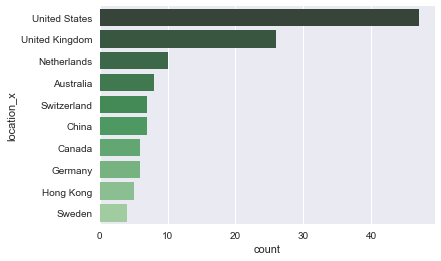

In [64]:
# Bar plot for the 10 first countries having the most universities in the rankings
sns.countplot(y="location_x", data=inner_data, palette="Greens_d",
              order=inner_data.location_x.value_counts().iloc[:10].index)

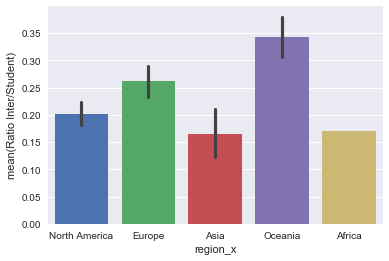

In [65]:
# Bar plot for the regions having the most universities in the ranking
sns.barplot(x = 'region_x', y = 'Ratio Inter/Student', data = inner_data, estimator=np.mean,saturation=10)

In [66]:
# We convert the following columns to numeric
inner_data['overall_rank,Total Staff,Inter Staff,Total Student,Inter Student,scores_teaching_rank'.split(',')] = inner_data['overall_rank,Total Staff,Inter Staff,Total Student,Inter Student,scores_teaching_rank'.split(',')].apply(pd.to_numeric, errors='coerce')

[(0, 200)]

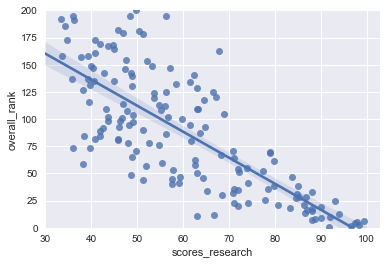

In [67]:
# Scatter plot to show correlation between scores_research and overall_rank
sns.regplot('scores_research', 'overall_rank', inner_data).set(ylim=(0, 200))

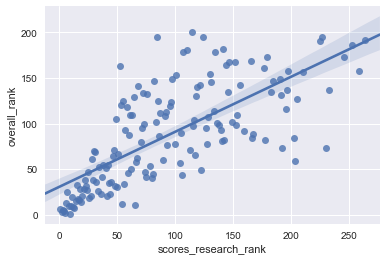

In [68]:
# Scatter plot to show correlation between scores_research_rank and overall_rank
# We conclude that using the column X_rank or X is the same, so we won't distinguish between them in the next plots
plot2 = sns.regplot('scores_research_rank', 'overall_rank', inner_data)

In [69]:
# We are transforming some of our columns into usable data, like stats_female_male_ratio which has the form 48:52 to 0.48
for index_string, string in enumerate (inner_data['stats_female_male_ratio']): 
    if string != None:
        inner_data['stats_female_male_ratio'][index_string] = str(string)[:2]
inner_data['stats_female_male_ratio'] = pd.to_numeric(inner_data['stats_female_male_ratio'],errors = 'coerce')/100
inner_data['number_female'] = inner_data['stats_female_male_ratio'] * inner_data['number of students']

/Users/KhalilCherif/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



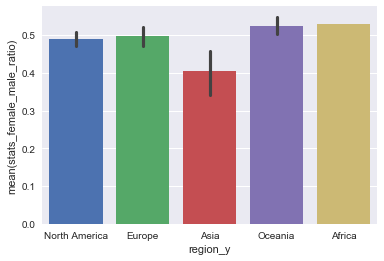

In [70]:
# Barplot for the proportion of women in the universities by region.
sns.barplot(x = 'region_y', y = 'stats_female_male_ratio', data = inner_data, estimator = np.mean,saturation=10)

In [71]:
# Creating a column 'number_of_subjects'
inner_data['number_of_subjects'] = inner_data['subjects_offered'].apply(lambda x: len(x.split(',')))

[]

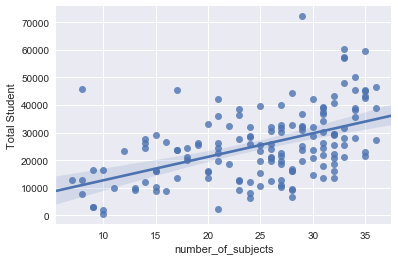

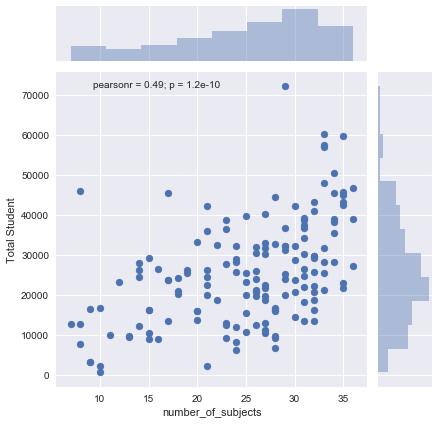

In [72]:
# Checking if there is a relation between the number of subjects offered and the ranking, even though the correlation
# is equal to 0.49, from the graphs we can see that they are somewhat correlated.
fig, axe = plt.subplots()

axe = sns.regplot('number_of_subjects', 'Total Student', inner_data)
sns.jointplot(x ='number_of_subjects', y ='Total Student', data = inner_data)
plt.plot()

In [73]:
# Transforming the rank columns into int and replacing the '=' sign by ''
inner_data['rank']=inner_data['rank'].apply(lambda x: int(str(x).replace('=','')))

In [74]:
# This line of code allows us to find the columns containing the word 'rank', we will use it in the next cell
inner_data.columns[pd.Series(inner_data.columns).apply(lambda x: x.lower().__contains__('rank'))]

Index(['overall_rank', 'rank', 'scores_citations_rank',
       'scores_industry_income_rank', 'scores_international_outlook_rank',
       'scores_overall_rank', 'scores_research_rank', 'scores_teaching_rank'],
      dtype='object')

In [75]:
# Dataframe containing only columns with 'rank' word
rank_data = inner_data[inner_data.columns[pd.Series(inner_data.columns).apply(lambda x: x.lower().__contains__('rank'))]]

From now on, we will try to find a relation between each ranking and the  'rank' (note that rank is the ranking from timeshighereducation and overall_rank is the ranking from topuniversities)

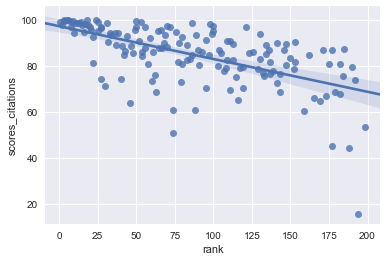

In [76]:
# Seems like scores_citations was an important criteria to make the ranking
sns.regplot(x='rank', y='scores_citations', data=inner_data)

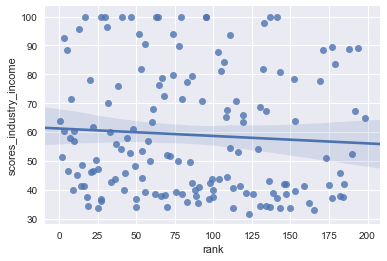

In [77]:
# According to the plot, it seems like scores_industry_income was not so relevant for timeshighereducation to
# make the ranking
sns.regplot(x='rank', y='scores_industry_income', data=inner_data)

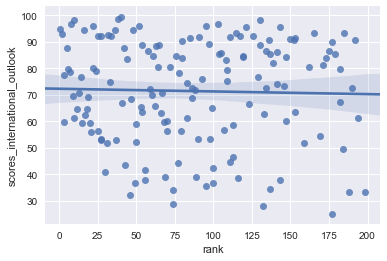

In [78]:
# Same case here, scores_international_outlook doesn't seem like an important criteria
sns.regplot(x='rank', y='scores_international_outlook', data=inner_data)

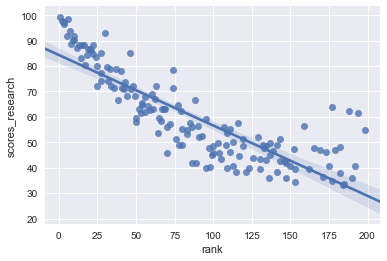

In [79]:
# In the cell and the one above, it's obvious that scores_research and scores_teaching 
# were one the most important criterias
sns.regplot(x='rank', y='scores_research', data=inner_data)

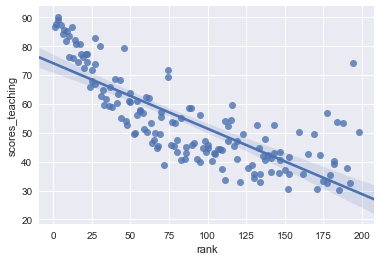

In [80]:
sns.regplot(x='rank', y='scores_teaching', data=inner_data)

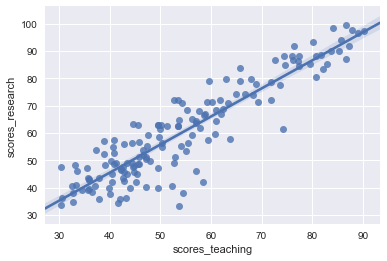

In [81]:
# The similarity between scores_teaching and scores_research was pretty obvious, so we decided to plot them
# We can say that they are perfectly correlated, which means also that maybe they did not use both of them to make
# the ranking.
sns.regplot(x='scores_teaching', y='scores_research', data=inner_data)

# 5. The best university considering both ranking

In [82]:
# Here we decided to calculate, by curiosity, the vector coeffs, which represents the coefficient that may have been used
# by times higher education to make their ranking, the result is surprising, but using this vector to predict
# the ranking was pretty accurate, some examples next
coeffs = np.linalg.lstsq(np.array(rank_data[rank_data.columns.difference(['rank','overall_rank'])]),np.array(rank_data['rank']))[0]


In [83]:
for i in range(10):
    print('True ranking: {}\nEstimation: {}\n\n'.format(rank_data.iloc[i,1], coeffs.dot(np.asarray(rank_data.iloc[i,2:]))))

True ranking: 5
Estimation: 4.952188791257965


True ranking: 3
Estimation: 3.882828006015934


True ranking: 6
Estimation: 5.830929219582408


True ranking: 3
Estimation: 2.875412617293941


True ranking: 2
Estimation: 1.930502188051427


True ranking: 1
Estimation: 0.9513950891182776


True ranking: 16
Estimation: 15.849626179439465


True ranking: 8
Estimation: 7.980145198340792


True ranking: 9
Estimation: 8.763465582586308


True ranking: 10
Estimation: 9.952934713748924




In [84]:
# We decided to add the university columns to the rank_data and set it as index in the next cell
rank_data['university_name'] = inner_data['university name']

/Users/KhalilCherif/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [85]:
rank_data.set_index('university_name', inplace=True)

In [86]:
# Now, based on our rank_data, we decided to average every ranking for each university without giving an importance
# (meaning coefficients) to the columns. Since we are no experts, each column has a coefficient of 1.
# After averaging for each university, we found that MIT is the best university.
rank_data.apply(np.mean, axis=1).sort_values().index[0]

'Massachusetts Institute of Technology (MIT) '